# Bitcoin Prediction using Deep Learning

This time, you will build a basic Neural Network model to predict Bitcoin price based on historical Data.
This notebook helps you to train a model but you can use it however you want.

In [ ]:

import os

import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import helper_functions as hf

import warnings
warnings.filterwarnings("ignore")

CURDIR = os.path.dirname(os.getcwd())
DATADIR = os.path.join(CURDIR,  "data")
FIGDIR = os.path.join(CURDIR,  "figure")
%matplotlib inline

In [ ]:
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

# Import Data
Our Data come from https://blockchain.info/.

Here, we load data into a Pandas DataFrame

In [ ]:
df_blockchain = pd.read_csv(os.path.join(DATADIR, "df_blockchain.csv"), delimiter=",")

# Explore Dataset

In [ ]:
df_blockchain.head()

In [ ]:
df_blockchain.columns.sort_values().shape

In [ ]:
df_blockchain.describe()

In [ ]:
print(df_blockchain.info(memory_usage='deep'))## dis le vrai usage de mémoire du df 
print(df_blockchain.memory_usage(deep=True))## stockage par série

In [ ]:
print(df_blockchain.isna().sum())

In [ ]:
print(df_blockchain.shape)
df_blockchain.dropna(axis=0,inplace=True)## drop les lignes où y'a des nan 
print(df_blockchain.shape)

In [ ]:
df_blockchain.dtypes.value_counts().plot.pie()# petit camenbert des différents type du dataframe
plt.show()

In [ ]:
for col in df_blockchain.select_dtypes('float'):## tu peux aussi faire df.select_dtypes(exclude="object") par exemple
    sns.distplot(df_blockchain[col])
    # df.hist(column=col,by="column de ségrégation") --> histogramme
    # df[col].plot.kde() --> densité
    plt.show()

In [ ]:
for col in df_blockchain.select_dtypes('object'):
    print(col)

In [ ]:
Price=df_blockchain["market-price"]

In [ ]:
plt.plot(Price.values)

In [ ]:
plt.plot(df_blockchain["total-bitcoins"]/500)
plt.plot(df_blockchain["market-price"])

In [ ]:
plt.plot(Price[1750:-30])
plt.plot(Price[-30:])

In [ ]:
df_indexed=df_blockchain.set_index("Date")

In [ ]:
df_indexed.index = pd.to_datetime(df_blockchain.set_index("Date").index)
min_year=df_indexed.index.year.min()
max_year=df_indexed.index.year.max()
print("min year", df_indexed.index.year.min())
print("max year",df_indexed.index.year.max())

In [ ]:
colormap=plt.cm.gist_ncar
colost=[colormap(i) for i in np.linspace(0,0.95,1+max_year-min_year)]## len du nb de trucs à plot
print(len(colost))

In [ ]:
df_indexed.index = pd.to_datetime(df_blockchain.set_index("Date").index)
df_blockchain["Year"]=df_indexed.index.year
df_blockchain["Month"]=df_indexed.index.month
df_blockchain["Day"]=df_indexed.index.day
df_blockchain["week_day"]=df_indexed.index.weekday

In [ ]:
plt.figure()
plt.title("Market price over year")
for i in range(min_year,max_year+1,1):
    plt.plot(df_blockchain[df_blockchain["Year"]==i]["market-price"].values,color=colost[i-min_year],label=i)
plt.legend()
plt.grid()

In [ ]:
print(df_blockchain.columns)

In [ ]:
for j in df_blockchain.columns[2:-4]:
    plt.figure()
    for i in range(min_year,max_year+1,1):
        plt.title(f"{j} over year")
        plt.plot(df_blockchain[df_blockchain["Year"]==i][j].values,color=colost[i-min_year],label=i)
        plt.xlabel("year")
        plt.ylabel(j)
        plt.legend()
    plt.grid()
    plt.show()

In [ ]:
target="market-price"
for i in df_blockchain.select_dtypes('float'): 
    print(i)
    plt.figure()
    plt.scatter(df_blockchain[i],df_blockchain[target])
    plt.xlabel(i)
    plt.ylabel(target)
    plt.grid()
    plt.show()

In [ ]:
plt.figure(figsize=(16,7))
sns.heatmap(df_blockchain.corr(),cmap="seismic",annot=True)

In [ ]:
corr_matrix=df_blockchain.corr()
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))
p=0
coupled=[]
for index, value in sol.items():
    if value>0.9:
        p+=1
        coupled.append(index)
print(p,"features have more than 90% of correlation")

In [ ]:
print(coupled)

In [ ]:
df_blockchain.columns

In [ ]:
features_to_be_dropped=["market-cap","difficulty","n-unique-addresses","n-transactions-excluding-popular","estimated-transaction-volume-usd"]
df_blockchain.drop(features_to_be_dropped,axis=1,inplace=True)

In [ ]:
plt.figure(figsize=(16,7))
sns.heatmap(df_blockchain.corr(),cmap="seismic",annot=True)

In [ ]:
plt.figure()
for i in range(0,7,1):
    plt.title(f"market price over week day ")
    plt.plot(df_blockchain[df_blockchain["week_day"]==i]["market-price"].values,color=colost[i],label=i,alpha=0.7)  
plt.legend()
plt.grid()
plt.show()

In [ ]:
colormap=plt.cm.gist_ncar
colostm=[colormap(i) for i in np.linspace(0,0.95,1+12)]## len du nb de trucs à plot

plt.figure()
for i in range(0,13,1):
    plt.title(f"market price over month ")
    plt.plot(df_blockchain[df_blockchain["Month"]==i]["market-price"].values,label=i,color=colostm[i])
plt.legend()
plt.grid()
plt.show()

In [ ]:
def imputation(df):
    df.dropna(axis=0,inplace=True)
    return(df)

In [ ]:
def encodage(df):

    return df 

In [ ]:
def feature_engineering(df):  # (création de variable à partir d'une autre)
    """
    Entries : 

    Aim : 

    Outputs: 
    """
    ########################################################## DATE ##################################################################
    features_to_be_dropped=["market-cap","difficulty","n-unique-addresses","n-transactions-excluding-popular","estimated-transaction-volume-usd","n-transactions-total"]## coreelation
    df.drop(features_to_be_dropped,axis=1,inplace=True)
    df_indexed.index = pd.to_datetime(df.set_index("Date").index)
    df["Year"]=df_indexed.index.year
    df["Month"]=df_indexed.index.month
    df["Day"]=df_indexed.index.day
    df["week_day"]=df_indexed.index.weekday
    df.index = pd.to_datetime(df.set_index("Date").index)
    df.drop("Date",axis=1,inplace=True)
    ###################################################### TRI DES VALEURS PROPRES ? ################################################# 


    ###################################################### Random Forest #############################################################

    return(df)

In [ ]:
def scaler(df):
    scale= StandardScaler()
    columns=df.columns
    df = scale.fit_transform(df)
    df = pd.DataFrame(df, columns=columns)
    return df

In [ ]:
def preprocessing(df):
    df = imputation(df)
    df = encodage(df)
    df = feature_engineering(df)
    df = scaler(df)
    X = df.drop('market-price', axis=1)
    y = df["market-price"]
    return X, y,df

# Process data (Making sequences)

here we split and process data before training.

LSTM layer as an input layer expects the data to be 3 dimensions, we will use 'process_data' function to split data into sequences of a fixed length (rnn_size).

The neural network is expecting to have an input's shap of [batch_size, rnn_size, nb_features]

In [260]:
df_blockchain = pd.read_csv(os.path.join(DATADIR, "df_blockchain.csv"), delimiter=",")

In [261]:
X,y,df=preprocessing(df_blockchain)

In [262]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5, test_size=10)
for train_index, test_index in tscv.split(df):
    print("TRAIN:", train_index, "TEST:", test_index)
    print(train_index.max()+2000)
    df_train,df_test=df.iloc[train_index[0]+2000:train_index[-1]+2000], df.iloc[test_index[0]+2000:test_index[-1]+2000]


TRAIN: [   0    1    2 ... 3480 3481 3482] TEST: [3483 3484 3485 3486 3487 3488 3489 3490 3491 3492]
5482
TRAIN: [   0    1    2 ... 3490 3491 3492] TEST: [3493 3494 3495 3496 3497 3498 3499 3500 3501 3502]
5492
TRAIN: [   0    1    2 ... 3500 3501 3502] TEST: [3503 3504 3505 3506 3507 3508 3509 3510 3511 3512]
5502
TRAIN: [   0    1    2 ... 3510 3511 3512] TEST: [3513 3514 3515 3516 3517 3518 3519 3520 3521 3522]
5512
TRAIN: [   0    1    2 ... 3520 3521 3522] TEST: [3523 3524 3525 3526 3527 3528 3529 3530 3531 3532]
5522


In [320]:
def splitting(df,start,nb_split,size_test):
    tscv = TimeSeriesSplit(n_splits=nb_split, test_size=size_test)
    list_df_train,list_df_test=[],[]
    df=df.iloc[start:]
    for train_index, test_index in tscv.split(df):
        print("TRAIN:", train_index, "TEST:", test_index)
        df_train=df.iloc[train_index[0]:train_index[-1]]
        df_test=df.iloc[test_index[0]:test_index[-1]]
        list_df_test.append(df_test)
        list_df_train.append(df_train)
    return list_df_train,list_df_test

In [264]:
columns=df.columns

In [265]:
def process_data(data, rnn_size=3, target_id=0, columns_size=len(columns)-1):## -1 car on ne veut pas market price dans X 
    X = []
    y = []
    for i in range(len(data)-rnn_size):
        X.append(data.iloc[i:i+rnn_size,1:])# pas de market price dans X 
        y.append(data.iloc[i+rnn_size,0])
    return np.array(X).astype(np.float32).reshape((-1,rnn_size,columns_size)), np.array(y).astype(np.float32)

In [323]:
def split_test_train(list_df_train, list_df_test):
    """
    Entries:
    list_df_train (list) : liste contenant les DataFrame du jeu d'entraînement de cross-validation
    list_df_test (list) : liste contenant les DataFrame du jeu de test de cross-validation
    Aim:
    Génère 4 listes, une contenant les variables explicatives d'entraînement, une contenant la variable à expliquer d'entraînement et pareil pour le test
    Outputs:
    list_X_train (list)
    list_X_test (list)
    list_y_train (list)
    list_y_test (list)
    """
    list_X_train, list_X_test, list_y_train, list_y_test = [], [], [], []
    for df_train in list_df_train:
        X_train, y_train = process_data(df_train)
        list_X_train.append(X_train)
        list_y_train.append(y_train)
    for df_test in list_df_test:
        X_test, y_test = process_data(df_test)
        list_X_test.append(X_test)
        list_y_test.append(y_test)
    return list_X_train, list_X_test, list_y_train, list_y_test

In [458]:
list_df_train,list_df_test=splitting(df,2000,8,10)

TRAIN: [   0    1    2 ... 1450 1451 1452] TEST: [1453 1454 1455 1456 1457 1458 1459 1460 1461 1462]
TRAIN: [   0    1    2 ... 1460 1461 1462] TEST: [1463 1464 1465 1466 1467 1468 1469 1470 1471 1472]
TRAIN: [   0    1    2 ... 1470 1471 1472] TEST: [1473 1474 1475 1476 1477 1478 1479 1480 1481 1482]
TRAIN: [   0    1    2 ... 1480 1481 1482] TEST: [1483 1484 1485 1486 1487 1488 1489 1490 1491 1492]
TRAIN: [   0    1    2 ... 1490 1491 1492] TEST: [1493 1494 1495 1496 1497 1498 1499 1500 1501 1502]
TRAIN: [   0    1    2 ... 1500 1501 1502] TEST: [1503 1504 1505 1506 1507 1508 1509 1510 1511 1512]
TRAIN: [   0    1    2 ... 1510 1511 1512] TEST: [1513 1514 1515 1516 1517 1518 1519 1520 1521 1522]
TRAIN: [   0    1    2 ... 1520 1521 1522] TEST: [1523 1524 1525 1526 1527 1528 1529 1530 1531 1532]


In [459]:
list_X_train, list_X_test, list_y_train, list_y_test=split_test_train(list_df_train, list_df_test)

In [460]:
# neural network model
from tensorflow.keras.layers import Dense,Bidirectional,Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping
def create_model():
    # Build the model
    callback = EarlyStopping(monitor='loss', patience=5)
    model = keras.Sequential()
    look_back=3 ### rrn size --> à moduler avec la fonction preprodata
    model.add(LSTM(50,batch_input_shape=(None, look_back, len(columns)-1),return_sequences=True,dropout=0.2))
    model.add(Dropout(0.2))
    model.add(LSTM(50,return_sequences=True,dropout=0.2))
    model.add(Dropout(0.2))
    model.add(LSTM(50,return_sequences=True,dropout=0.2))
    model.add(Dropout(0.2))
    model.add(Dense(25))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer = "rmsprop", loss = 'mse')
    return model

In [456]:
loss=[]
loss_val=[]
weights=[]
# callback = tensorflow.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
batch_size=32
for i in range(len(list_X_train)):## nveut les entrainements inddpts
    X_train=list_X_train[i]
    y_train=list_y_train[i]
    X_test=list_X_test[i]
    y_test=list_y_test[i]
    model=create_model()
    print("Cross Val no : ", i )
    history=model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = batch_size, epochs = 50)
    loss.append(history.history["loss"])
    loss_val.append(history.history["val_loss"])
    weights.append(model.get_weights())

oss: 0.0509 - val_loss: 1.9487
Epoch 4/50
44/44 [==============================] - 1s 14ms/step - loss: 0.0411 - val_loss: 1.3968
Epoch 5/50
44/44 [==============================] - 1s 15ms/step - loss: 0.0401 - val_loss: 0.6603
Epoch 6/50
44/44 [==============================] - 1s 15ms/step - loss: 0.0371 - val_loss: 1.7399
Epoch 7/50
44/44 [==============================] - 1s 14ms/step - loss: 0.0332 - val_loss: 1.1832
Epoch 8/50
44/44 [==============================] - 1s 14ms/step - loss: 0.0333 - val_loss: 1.7885
Epoch 9/50
44/44 [==============================] - 1s 14ms/step - loss: 0.0322 - val_loss: 1.2535
Epoch 10/50
44/44 [==============================] - 1s 12ms/step - loss: 0.0296 - val_loss: 0.7630
Epoch 11/50
44/44 [==============================] - 1s 13ms/step - loss: 0.0305 - val_loss: 1.2146
Epoch 12/50
44/44 [==============================] - 1s 12ms/step - loss: 0.0277 - val_loss: 0.8154
Epoch 13/50
44/44 [==============================] - 1s 13ms/step - loss: 0

KeyboardInterrupt: 

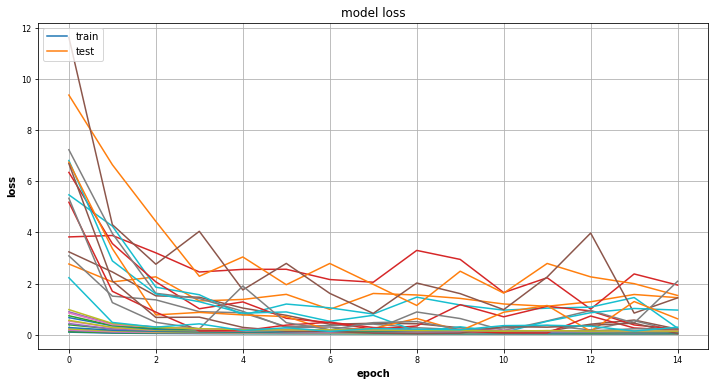

In [436]:
from pandas.core.common import flatten
for i in range(len(loss)):
    plt.plot(loss[i])
    plt.plot(loss_val[i])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    # plt.legend(['train', 'test'], loc='upper left')
    plt.grid()

In [452]:

old_weights=np.average(np.array(weights),axis=0)
old_weights=weights[-1]
# Build the model
new_model = keras.Sequential()
look_back=3 ### rrn size --> à moduler avec la fonction preprodata
new_model.add(LSTM(50,batch_input_shape=(6, look_back, len(columns)-1),return_sequences=True, stateful=True,dropout=0.2))
new_model.add(Dropout(0.2))
new_model.add(LSTM(50,return_sequences=True, stateful=True,dropout=0.2))
new_model.add(Dropout(0.2))
new_model.add(LSTM(50,return_sequences=True, stateful=True,dropout=0.2))
new_model.add(Dropout(0.2))
new_model.add(Dense(25))
new_model.add(Dropout(0.2))
new_model.add(Dense(1))
new_model.set_weights(old_weights)

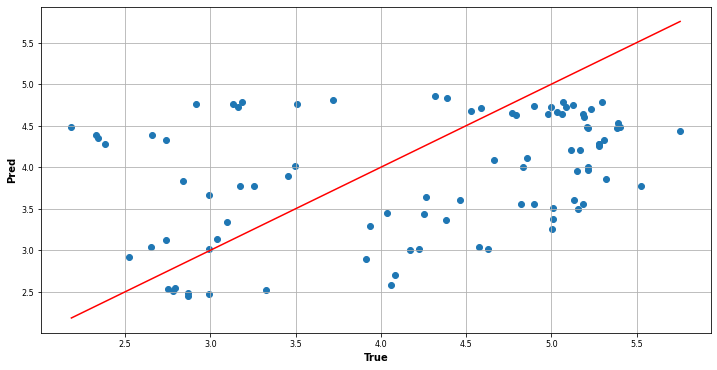

In [455]:
y_pred=[]
for i in range(len(list_X_test)):
    pred=new_model.predict(list_X_test[i])
    for j in range(len(pred)):
        y_pred.append(np.mean(pred[j]))

plt.scatter(list_y_test,y_pred)
plt.plot(np.linspace(np.min(list_y_test),np.max(list_y_test),len(y_pred)),np.linspace(np.min(list_y_test),np.max(list_y_test),len(y_pred)),color="red")
plt.xlabel("True")
plt.ylabel("Pred")
plt.grid()

In [ ]:
# neural network model
from tensorflow.keras.layers import Dense,Bidirectional
from tensorflow.keras.layers import LSTM
batch_size=2
# Build the model
model = keras.Sequential()
look_back=3 ### rrn size --> à moduler avec la fonction preprodata
model.add(Bidirectional(LSTM(100, batch_input_shape=(batch_size, look_back, len(columns)))))## warnings back prop trop brusque
model.add(Dense(75))
model.add(Dense(50))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer = "rmsprop", loss = 'mse')## + perf si modèle RNN mais pas sûr 

In [ ]:
loss=[]
loss_val=[]
for i in range(len(list_X_train)):
    X_train=list_X_train[i]
    y_train=list_y_train[i]
    X_test=list_X_test[i]
    y_test=list_y_test[i]
    history=model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = batch_size, epochs = 25)
    loss.append(history.history["loss"])
    loss_val.append(history.history["val_loss"])

In [ ]:
from pandas.core.common import flatten
plt.plot(flatten(loss))
plt.plot(flatten(loss_val))
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()

# Evaluation

In [ ]:
# compute prediction for test
y_pred =model.predict(X_test[:3])

In [ ]:
plt.scatter(y_test,y_pred)
plt.plot(np.linspace(np.min(y_test),np.max(y_test),50),np.linspace(np.min(y_test),np.max(y_test),50),color="red")
plt.grid()

In [ ]:
# compute rmse for test
y_pred_inverse = scaler.inverse_transform(np.concatenate([y_pred, data_test[-len(y_pred):,1:]], axis=1))
y_test_inverse = scaler.inverse_transform(data_test.reshape(-1,len(columns)))[rnn_size:]

rmse_score = 
print("rmse score : ", rmse_score)

In [ ]:
#Graphs for predicted values
plt.plot(y_test_inverse[rnn_size:,0], color = 'red', label = 'true BTC price')
plt.plot(y_pred_inverse[:,0], color = 'blue', label = 'predicted BTC price')
plt.title('BTC price Prediction')
plt.xlabel('Days')
plt.ylabel('BTC price')
plt.legend()
plt.show()

In [ ]:
# If you get this far, you can : 
- Test other neural network models
- Test other optimizers
- Compare results between Arima and RNN models
- Find a way to choose most important variables
- ...